### Importar Librerias

In [13]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

### Cargar dataset

In [3]:
df = pd.read_csv('cars.csv')

df.head()

,manufacturer_name,model_name,transmission,color,odometer_value,year_produced,engine_fuel,engine_has_gas,engine_type,engine_capacity,...,feature_1,feature_2,feature_3,feature_4,feature_5,feature_6,feature_7,feature_8,feature_9,duration_listed
0,Subaru,Outback,automatic,silver,190000,2010,gasoline,False,gasoline,2.5,...,True,True,True,False,True,False,True,True,True,16
1,Subaru,Outback,automatic,blue,290000,2002,gasoline,False,gasoline,3.0,...,True,False,False,True,True,False,False,False,True,83
2,Subaru,Forester,automatic,red,402000,2001,gasoline,False,gasoline,2.5,...,True,False,False,False,False,False,False,True,True,151
3,Subaru,Impreza,mechanical,blue,10000,1999,gasoline,False,gasoline,3.0,...,False,False,False,False,False,False,False,False,False,86
4,Subaru,Legacy,automatic,black,280000,2001,gasoline,False,gasoline,2.5,...,True,False,True,True,False,False,False,False,True,7


#### Revisamos que tipos de datos estamos trabajando

In [4]:
df.dtypes

manufacturer_name     object
model_name            object
transmission          object
color                 object
odometer_value         int64
year_produced          int64
engine_fuel           object
engine_has_gas          bool
engine_type           object
engine_capacity      float64
body_type             object
has_warranty            bool
state                 object
drivetrain            object
price_usd            float64
is_exchangeable         bool
location_region       object
number_of_photos       int64
up_counter             int64
feature_0               bool
feature_1               bool
feature_2               bool
feature_3               bool
feature_4               bool
feature_5               bool
feature_6               bool
feature_7               bool
feature_8               bool
feature_9               bool
duration_listed        int64
dtype: object

#### Generamos los estadisticos descriptivos de los datos númericos

In [5]:
df.describe()

,odometer_value,year_produced,engine_capacity,price_usd,number_of_photos,up_counter,duration_listed
count,38531.000000,38531.000000,38521.000000,38531.000000,38531.000000,38531.000000,38531.000000
mean,248864.638447,2002.943734,2.055161,6639.971021,9.649062,16.306091,80.577249
std,136072.376530,8.065731,0.671178,6428.152018,6.093217,43.286933,112.826569
min,0.000000,1942.000000,0.200000,1.000000,1.000000,1.000000,0.000000
25%,158000.000000,1998.000000,1.600000,2100.000000,5.000000,2.000000,23.000000
50%,250000.000000,2003.000000,2.000000,4800.000000,8.000000,5.000000,59.000000
75%,325000.000000,2009.000000,2.300000,8990.000000,12.000000,16.000000,91.000000
max,1000000.000000,2019.000000,8.000000,50000.000000,86.000000,1861.000000,2232.000000


#### Revisamos medidas de tendencia central para el precio de los autos

In [6]:
df['price_usd'].mean()

np.float64(6639.971021255613)

In [7]:
df['price_usd'].median()

np.float64(4800.0)

<Axes: ylabel='Frequency'>

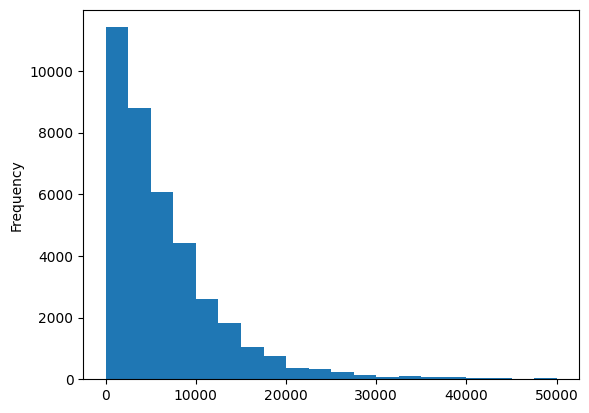

In [8]:
df['price_usd'].plot.hist(bins=20)

##### Podemos identificar que la media y la mediana son notablemente diferente, esto se explica ya que tenemos la gran mayoria de los autos entre los 0 y 10.000 USD, pero tambien tenemos algunos autos con precio muy altos.

Vamos a clasificar los datos por marca, para lograr identificar los autos que presentan valores atipicos

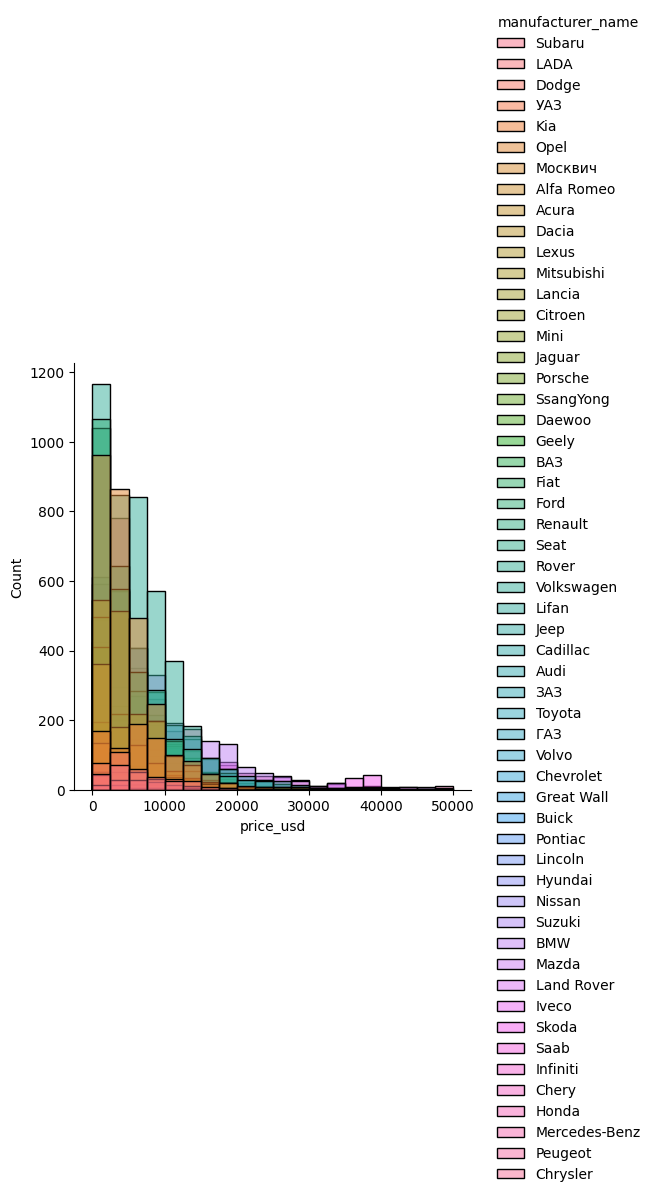

In [9]:
sns.displot(df, x= 'price_usd', hue='manufacturer_name', bins=20)

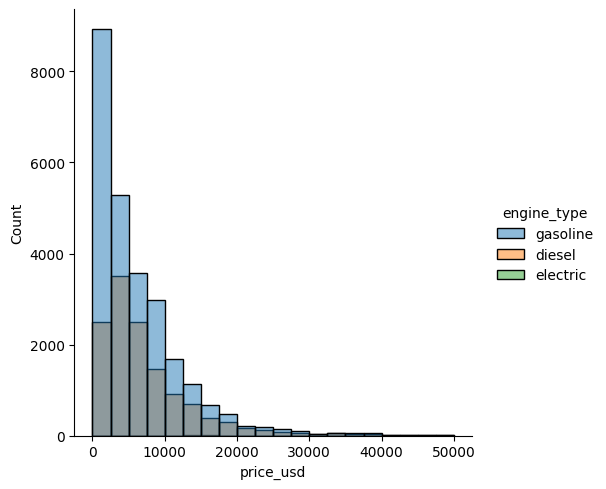

In [10]:
sns.displot(df, x= 'price_usd', hue='engine_type', bins=20)

In [11]:
df.groupby('engine_type').count()

,manufacturer_name,model_name,transmission,color,odometer_value,year_produced,engine_fuel,engine_has_gas,engine_capacity,body_type,...,feature_1,feature_2,feature_3,feature_4,feature_5,feature_6,feature_7,feature_8,feature_9,duration_listed
engine_type,,,,,,,,,,,,,,,,,,,,,
diesel,12874,12874,12874,12874,12874,12874,12874,12874,12874,12874,...,12874,12874,12874,12874,12874,12874,12874,12874,12874,12874
electric,10,10,10,10,10,10,10,10,0,10,...,10,10,10,10,10,10,10,10,10,10
gasoline,25647,25647,25647,25647,25647,25647,25647,25647,25647,25647,...,25647,25647,25647,25647,25647,25647,25647,25647,25647,25647


* Se identifica que hay pocos autos electricos en oferta

##### A continuación se realiza un histograma, para analizar como están los precios de un modelo de auto especifíco con respecto al año de fabricación

<Axes: xlabel='price_usd', ylabel='Count'>

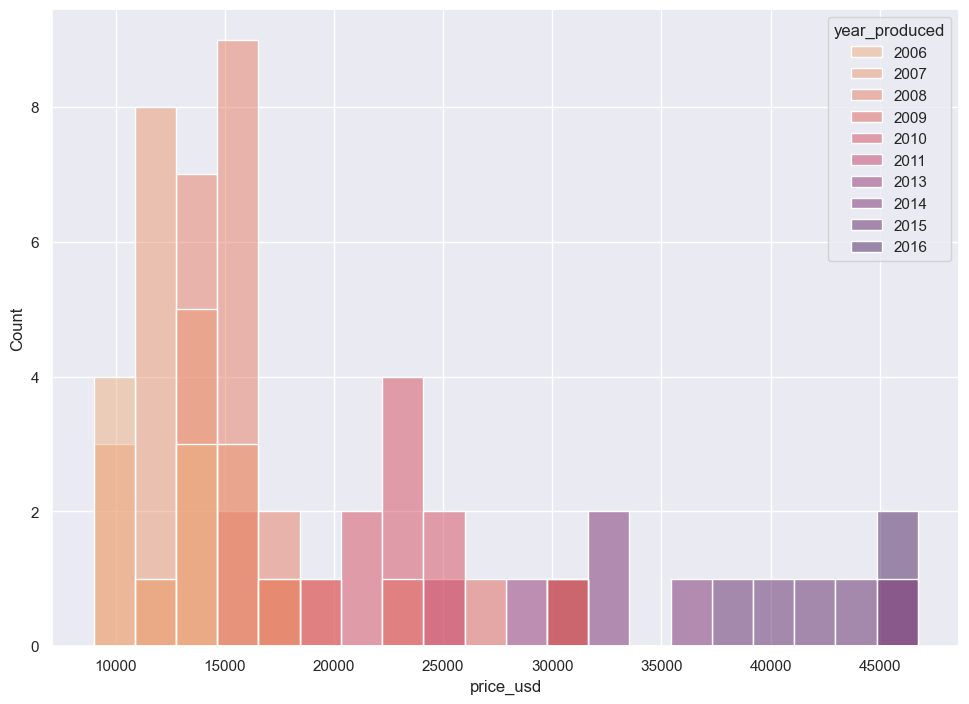

In [30]:
Q7_df = df[(df['manufacturer_name']=='Audi') & (df['model_name']=='Q7')]
sns.histplot(Q7_df, x='price_usd', hue = 'year_produced', palette='flare', bins=20)

* Se hace evidente que a medida que los autos son más antiguos, el valor del mismo es menor

#### Revisamos medidas de dispersión para el precio de los autos

In [16]:
desviacion= df['price_usd'].std()

rango = df['price_usd'].max() - df['price_usd'].min()

# Quartiles
median = df['price_usd'].median()
Q1 = df['price_usd'].quantile(q=0.25)
Q3 = df['price_usd'].quantile(q=0.75)
min_val = df['price_usd'].quantile(q=0)
max_val = df['price_usd'].quantile(q=1.0)

#print(min_val, Q1, median, Q3, max_val)

iqr = Q3 - Q1

minlimit = Q1 - 1.5*iqr
maxlimit = Q3 + 1.5*iqr

print('La desviacion estandar es: {}'.format(desviacion))
print('El rango es: {}'.format(rango))
print('La distribucion de los cuartiles es: {}, {}, {}, {}'.format(min_val, Q1, median, Q3, max_val))
print('El rango intercuartil es: {}'.format(iqr))
print('rango para detección de outliers: {}, {}'.format(minlimit, maxlimit))

La desviacion estandar es: 6428.1520182029035
El rango es: 49999.0
La distribucion de los cuartiles es: 1.0, 2100.0, 4800.0, 8990.0
El rango intercuartil es: 6890.0
rango para detección de outliers: -8235.0, 19325.0


* We notice that the distribution is skewed to the left, for the value of the range is aproximately 50.000, while the quartiles are between 1 and 8.990

#### We generate a graph allows us better visualizate the distribution

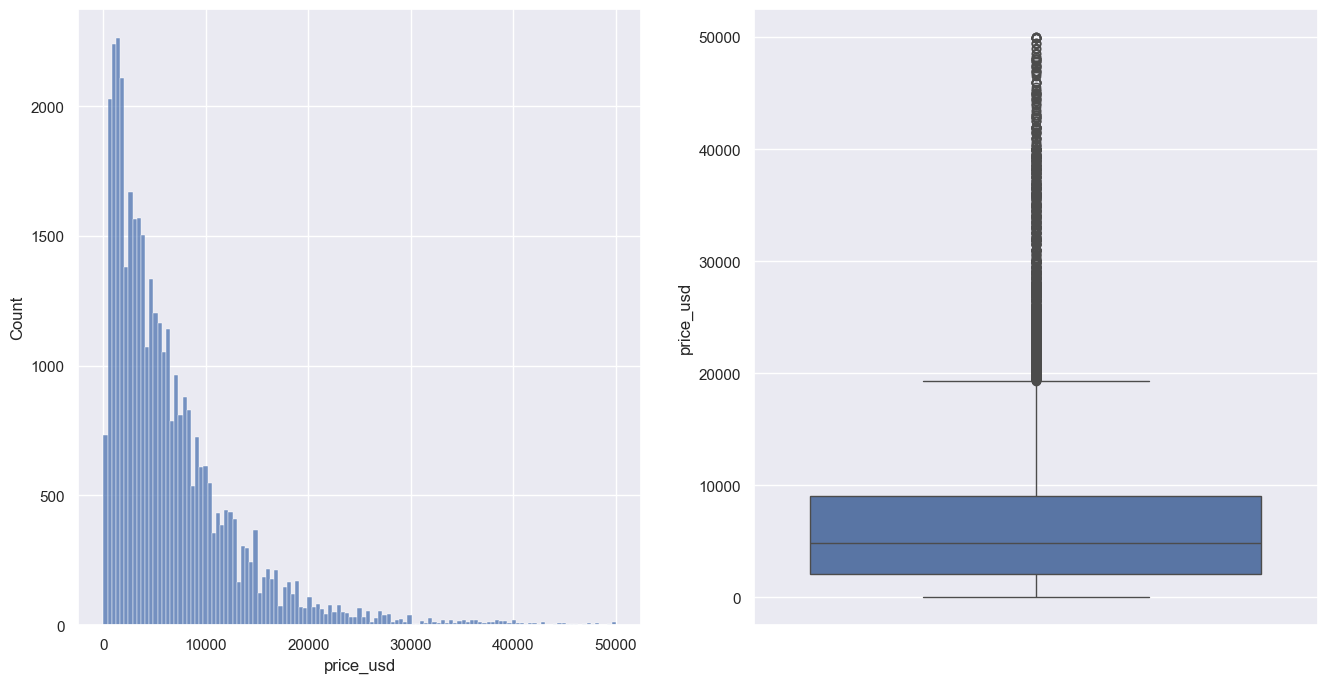

In [36]:
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(16, 8))
sns.histplot(df['price_usd'], ax=axes[0])
sns.boxplot(df['price_usd'], ax=axes[1])
plt.show()


C:\Users\Geyson\AppData\Local\Temp\ipykernel_6708\3304373522.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x = 'engine_fuel', y = 'price_usd', data = df, palette='tab10')


<Axes: xlabel='engine_fuel', ylabel='price_usd'>

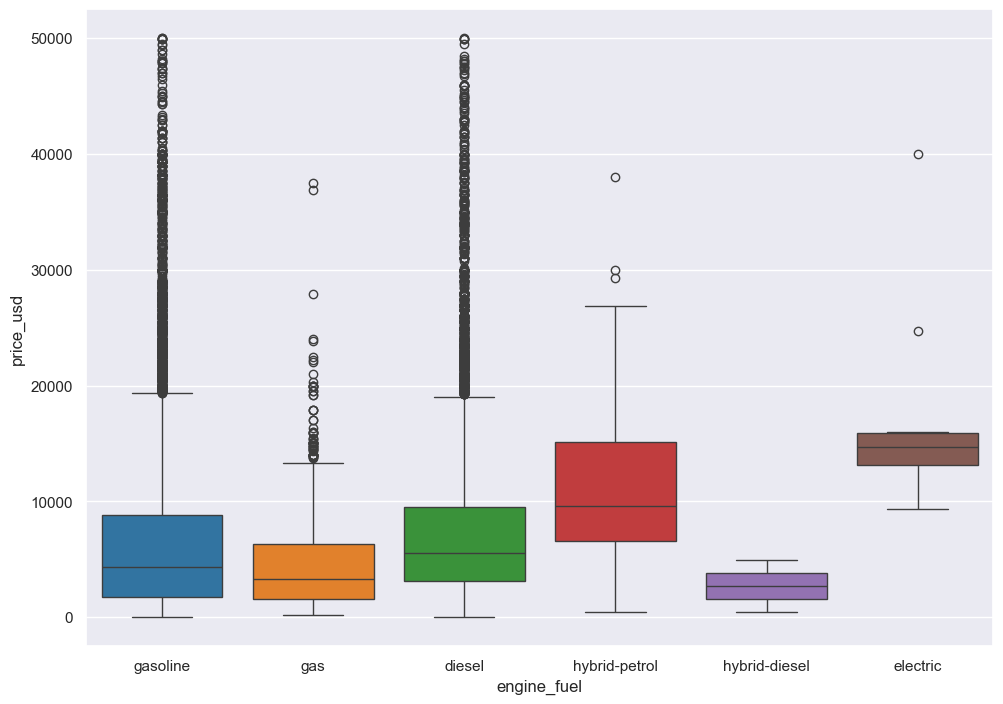

In [28]:
sns.boxplot(x = 'engine_fuel', y = 'price_usd', data = df, palette='tab10')


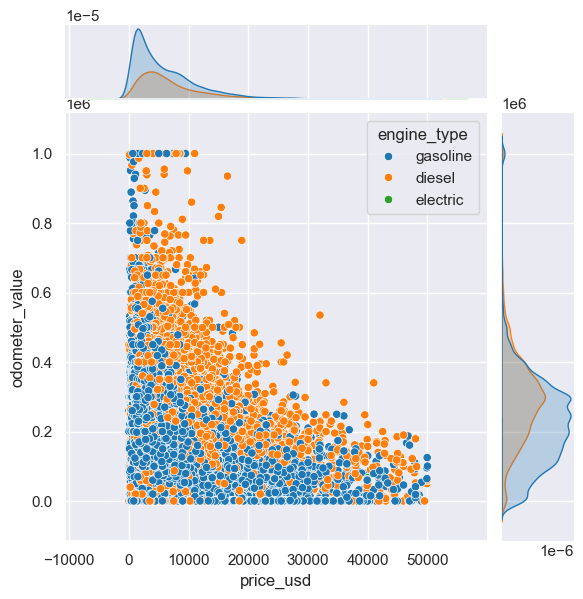

In [43]:
sns.jointplot(data=df, x='price_usd', y='odometer_value', hue='engine_type', palette='tab10')
plt.show()

* The picture, show us how while the values in 'odometer_value' increment, the values in 'price_usd' decrement 

C:\Users\Geyson\AppData\Local\Temp\ipykernel_6708\202436562.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot( x= 'price_usd', y= 'manufacturer_name', data = df, palette='tab10', orient='h')


<Axes: xlabel='price_usd', ylabel='manufacturer_name'>

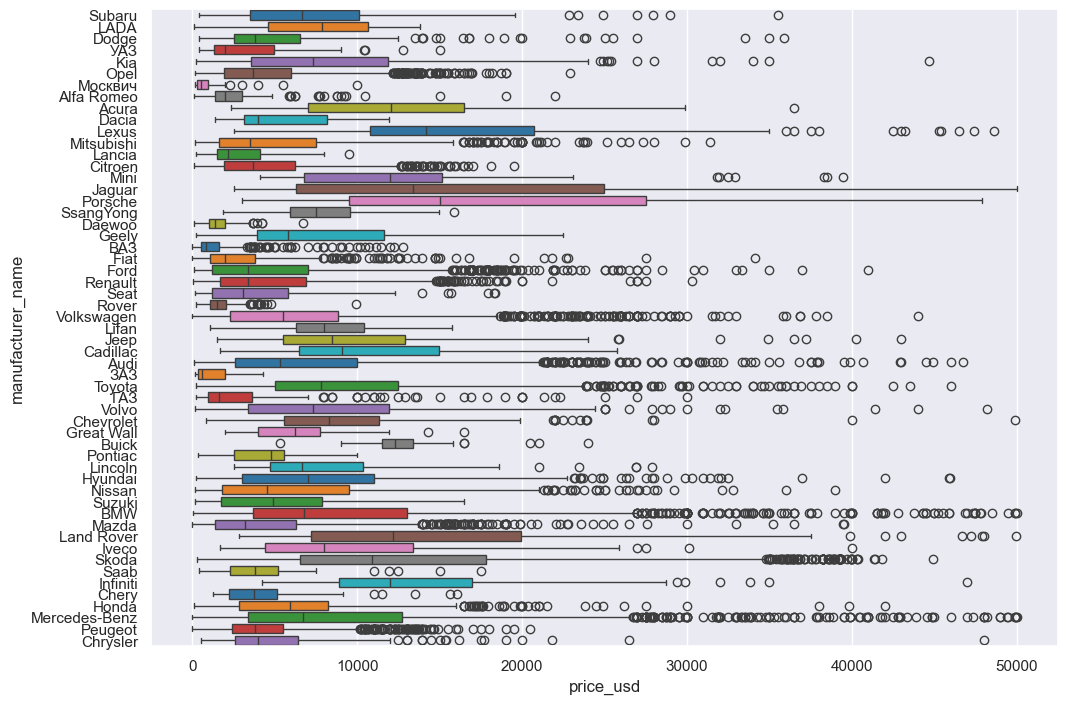

In [48]:
sns.boxplot( x= 'price_usd', y= 'manufacturer_name', data = df, palette='tab10', orient='h')